## Imports

In [ ]:
# %matplotlib inline

import numpy as np
import pandas as pd
import gensim
import utils
import re  
import seaborn as sns
import warnings
import lightgbm as lgb
import xgboost as xgb
from lightgbm import LGBMRegressor
from sklearn.manifold import TSNE
from utils import clean_dataset
# from utils import word_vector
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from collections import defaultdict  # For word frequency
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from utils import hyperparameterTuning_RandomForest
from utils import hyperparameterTuning_XGBoost
from utils import hyperparameterTuning_MLP
from utils import plot_feature_importance
from utils import featureScore
from utils import folderPath
from utils import metrics
from utils import removeColumnContainString
from utils import Feature_Extraction
from utils import Normalizing

random_state=2022

In [ ]:
figurePath=folderPath('SavedFigures')
datasetePath=folderPath('Dataset')  

1
1


In [ ]:
path='/content/drive/MyDrive/NLP/'
df=pd.read_csv(path + '3.csv')

## Skipgram

### caption

In [ ]:
tokenized_caption = df['caption'].apply(lambda x: str(x).split()) # tokenizing 
model_w2v_caption = gensim.models.Word2Vec(tokenized_caption,
        size=100, # desired no. of features/independent variables
        window=5, # context window size
        min_count=2, # Ignores all words with total frequency lower than 2.                                  
        sg = 1, # 1 for skip-gram model
        hs = 0,
        negative = 10, # for negative sampling
        workers= 32 # no.of cores
        )
model_w2v_caption.train(tokenized_caption, total_examples= len(df['caption']), epochs=20)
# model_w2v_caption.save(path + "Save Models\\200_Word2vec_Skipgram_Caption.model")

(46353824, 49024560)

In [ ]:
def word_vector(tokens, size,model):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model[word].reshape((1, size))
            count += 1
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

In [ ]:
wordvec_arrays = np.zeros((len(tokenized_caption), 100)) 
for i in range(len(tokenized_caption)):
    wordvec_arrays[i,:] = word_vector(tokenized_caption[i], 100,model_w2v_caption)
w2v_df_caption = pd.DataFrame(wordvec_arrays)
w2v_df_caption.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(88514, 100)

### hastags

In [ ]:
tokenized_hashtags = df['hashtags'].apply(lambda x: str(x).split()) # tokenizing 
model_w2v_hashtags = gensim.models.Word2Vec(tokenized_hashtags,
        size=100, # desired no. of features/independent variables
        window=5, # context window size
        min_count=2, # Ignores all words with total frequency lower than 2.                                  
        sg = 1, # 1 for skip-gram model
        hs = 0,
        negative = 10, # for negative sampling
        workers= 32 # no.of cores
        )
model_w2v_hashtags.train(tokenized_hashtags, total_examples= len(df['hashtags']), epochs=20)
# model_w2v_caption.save(path + "Save Models\\200_Word2vec_Skipgram_Caption.model")

(9071903, 10681100)

In [ ]:
wordvec_arrays = np.zeros((len(tokenized_hashtags), 100)) 
for i in range(len(tokenized_hashtags)):
    wordvec_arrays[i,:] = word_vector(tokenized_hashtags[i], 100,model_w2v_hashtags)
w2v_df_hashtags = pd.DataFrame(wordvec_arrays)
w2v_df_hashtags.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(88514, 100)

### emojiText

In [ ]:
tokenized_emojiText = df['emoji_text'].apply(lambda x: str(x).split()) # tokenizing 
model_w2v_emojiText = gensim.models.Word2Vec(tokenized_emojiText,
        size=100, # desired no. of features/independent variables
        window=5, # context window size
        min_count=2, # Ignores all words with total frequency lower than 2.                                  
        sg = 1, # 1 for skip-gram model
        hs = 0,
        negative = 10, # for negative sampling
        workers= 32 # no.of cores
        )
model_w2v_emojiText.train(tokenized_emojiText, total_examples= len(df['emoji_text']), epochs=20)
# model_w2v_caption.save(path + "Save Models\\200_Word2vec_Skipgram_Caption.model")

(6261454, 9538300)

In [ ]:
wordvec_arrays = np.zeros((len(tokenized_emojiText), 100)) 
for i in range(len(tokenized_emojiText)):
    wordvec_arrays[i,:] = word_vector(tokenized_emojiText[i], 100,model_w2v_emojiText)
w2v_df_emojiText = pd.DataFrame(wordvec_arrays)
w2v_df_emojiText.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(88514, 100)

### Mentions

In [ ]:
tokenized_mentions = df['mentions'].apply(lambda x: str(x).split()) # tokenizing 
model_w2v_mentions = gensim.models.Word2Vec(tokenized_mentions,
        size=100, # desired no. of features/independent variables
        window=5, # context window size
        min_count=2, # Ignores all words with total frequency lower than 2.                                  
        sg = 1, # 1 for skip-gram model
        hs = 0,
        negative = 10, # for negative sampling
        workers= 32 # no.of cores
        )
model_w2v_mentions.train(tokenized_mentions, total_examples= len(df['mentions']), epochs=20)
# model_w2v_caption.save(path + "Save Models\\200_Word2vec_Skipgram_Caption.model")

(616635, 2139760)

In [ ]:
wordvec_arrays = np.zeros((len(tokenized_mentions), 100)) 
for i in range(len(tokenized_mentions)):
    wordvec_arrays[i,:] = word_vector(tokenized_mentions[i], 100,model_w2v_mentions)
w2v_df_mentions = pd.DataFrame(wordvec_arrays)
w2v_df_mentions.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(88514, 100)

In [ ]:
w2v_Df = pd.DataFrame(np.hstack((w2v_df_caption,w2v_df_hashtags,w2v_df_emojiText,w2v_df_mentions, df)))

In [ ]:
w2v_Df

,0,1,2,3,4,5,6,7,8,9,...,436,437,438,439,440,441,442,443,444,445
0,-0.357902,0.037359,-0.229896,-0.445,0.096542,-0.063016,-0.011829,0.016447,0.15151,-0.275229,...,0.233333,0.2,NaN,0,NaN,0,"['🍕', '🍕', '🍕', '🥐', '🥐', '🥐']","'pizza', 'pizza', 'pizza', 'croissant', 'crois...",6,0.0
1,-0.247492,0.151486,-0.357029,-0.238983,0.261308,0.02354,-0.165522,0.010777,0.024596,-0.43497,...,0.454545,0.136364,NaN,0,NaN,0,"['😋', '😋']","'face savoring food', 'face savoring food'",2,0.0
2,-0.299445,-0.071691,-0.169668,0.083997,0.209051,0.115329,-0.016987,-0.119881,-0.003599,0.078542,...,0.147222,-0.080556,NaN,0,NaN,0,"['🔺', '🔺']","'red triangle pointed up', 'red triangle point...",2,0.0
3,-0.238104,0.188466,-0.255932,-0.595156,0.271418,-0.253466,-0.326425,-0.216244,-0.14205,-0.176821,...,0.477273,0.085227,NaN,0,NaN,0,[],NaN,0,0.0
4,-0.384097,0.032623,-0.292239,-0.007864,0.178795,-0.004111,-0.087121,-0.044648,0.01741,-0.038063,...,0.444719,0.174416,"'#yeastbakery', '#eastlondon', '#eastlondonfoo...",4,NaN,0,[],NaN,0,18028.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88509,-0.601066,0.174431,-0.193524,-0.298979,0.026939,-0.254097,0.007824,0.162816,-0.160607,-0.004321,...,0.0,0.0,"'#sandysfishmongers', '#butcher', '#fishmonger...",20,NaN,0,[],NaN,0,10095.15
88510,0.31782,-0.241365,-0.702594,-0.532985,0.129487,-0.398928,0.454798,0.440301,0.446507,0.601406,...,0.0,0.0,"'#armisticeday', '#poppy', '#lestwerespect'",3,NaN,0,[],NaN,0,4333.666667
88511,-0.312932,0.061649,-0.291034,-0.254585,0.163683,-0.095381,-0.033426,-0.007186,0.000771,-0.115879,...,0.525,0.5,"'#notjustafishmonger', '#butcher', '#fishmonge...",9,NaN,0,[],NaN,0,5195.444444
88512,-0.642744,0.182439,-0.218398,-0.30102,-0.042034,-0.227764,-0.018533,0.211583,-0.140343,-0.045226,...,0.0,0.0,"'#sandysfishmongers', '#butcher', '#fishmonger...",19,NaN,0,[],NaN,0,10504.315789


In [ ]:
print(len(w2v_Df.columns))
a=len(w2v_Df.columns)-43
print(a)
w2v_Df[len(w2v_Df.columns)-43]
w2v_Df.rename(columns = {a:'likes'}, inplace = True)
df=utils.removeColumnContainString(w2v_Df)

446
403
Couldn't covert 401 to float
Couldn't covert 438 to float
Couldn't covert 440 to float
Couldn't covert 442 to float
Couldn't covert 443 to float


In [ ]:
df = pd.DataFrame(df)
data=df.astype(str)

normalizer = preprocessing.MinMaxScaler(feature_range=(0, 1))
normalized_df = pd.DataFrame(normalizer.fit_transform(data),  columns = data.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
clean_dataset(normalized_df)

,0,1,2,3,4,5,6,7,8,9,...,432,433,434,435,436,437,439,441,444,445
0,0.547966,0.614936,0.493054,0.317920,0.504189,0.451351,0.503907,0.574944,0.573230,0.397818,...,0.0,0.0,0.0,1.0,0.233333,0.600000,0.000000,0.0,0.041379,0.000000
1,0.592827,0.667227,0.430036,0.415081,0.579335,0.487800,0.421364,0.572700,0.518855,0.329461,...,1.0,0.0,0.0,0.0,0.454545,0.568182,0.000000,0.0,0.013793,0.000000
2,0.571718,0.564970,0.522908,0.567405,0.555502,0.526453,0.501137,0.520990,0.506774,0.549204,...,0.0,0.0,0.0,0.0,0.147222,0.459722,0.000000,0.0,0.013793,0.000000
3,0.596641,0.684171,0.480148,0.247103,0.583946,0.371151,0.334950,0.482853,0.447456,0.439928,...,0.0,1.0,0.0,0.0,0.477273,0.542614,0.000000,0.0,0.000000,0.000000
4,0.537323,0.612765,0.462151,0.524081,0.541703,0.476156,0.463470,0.550764,0.515776,0.499306,...,1.0,0.0,0.0,0.0,0.444719,0.587208,0.051948,0.0,0.000000,0.031080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88509,0.449165,0.677740,0.511082,0.386786,0.472445,0.370886,0.514462,0.632871,0.439506,0.513745,...,0.0,1.0,0.0,0.0,0.000000,0.500000,0.259740,0.0,0.000000,0.017404
88510,0.822521,0.487227,0.258745,0.276424,0.519215,0.309897,0.754513,0.742690,0.699620,0.772948,...,1.0,0.0,0.0,0.0,0.000000,0.500000,0.038961,0.0,0.000000,0.007471
88511,0.566238,0.626065,0.462749,0.407723,0.534811,0.437722,0.492308,0.565591,0.508647,0.466007,...,0.0,0.0,0.0,0.0,0.525000,0.750000,0.116883,0.0,0.000000,0.008957
88512,0.432230,0.681409,0.498753,0.385823,0.440988,0.381975,0.500306,0.652171,0.448187,0.496241,...,0.0,0.0,0.0,0.0,0.000000,0.500000,0.246753,0.0,0.000000,0.018109


In [ ]:
# dropped = [106,108,109,111,112,113]
# normalized_df = normalized_df.drop(dropped,axis=1)
# normalized_df

,0,1,2,3,4,5,6,7,8,9,...,432,433,434,435,436,437,439,441,444,445
0,0.547966,0.614936,0.493054,0.317920,0.504189,0.451351,0.503907,0.574944,0.573230,0.397818,...,0.0,0.0,0.0,1.0,0.233333,0.600000,0.000000,0.0,0.041379,0.000000
1,0.592827,0.667227,0.430036,0.415081,0.579335,0.487800,0.421364,0.572700,0.518855,0.329461,...,1.0,0.0,0.0,0.0,0.454545,0.568182,0.000000,0.0,0.013793,0.000000
2,0.571718,0.564970,0.522908,0.567405,0.555502,0.526453,0.501137,0.520990,0.506774,0.549204,...,0.0,0.0,0.0,0.0,0.147222,0.459722,0.000000,0.0,0.013793,0.000000
3,0.596641,0.684171,0.480148,0.247103,0.583946,0.371151,0.334950,0.482853,0.447456,0.439928,...,0.0,1.0,0.0,0.0,0.477273,0.542614,0.000000,0.0,0.000000,0.000000
4,0.537323,0.612765,0.462151,0.524081,0.541703,0.476156,0.463470,0.550764,0.515776,0.499306,...,1.0,0.0,0.0,0.0,0.444719,0.587208,0.051948,0.0,0.000000,0.031080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88509,0.449165,0.677740,0.511082,0.386786,0.472445,0.370886,0.514462,0.632871,0.439506,0.513745,...,0.0,1.0,0.0,0.0,0.000000,0.500000,0.259740,0.0,0.000000,0.017404
88510,0.822521,0.487227,0.258745,0.276424,0.519215,0.309897,0.754513,0.742690,0.699620,0.772948,...,1.0,0.0,0.0,0.0,0.000000,0.500000,0.038961,0.0,0.000000,0.007471
88511,0.566238,0.626065,0.462749,0.407723,0.534811,0.437722,0.492308,0.565591,0.508647,0.466007,...,0.0,0.0,0.0,0.0,0.525000,0.750000,0.116883,0.0,0.000000,0.008957
88512,0.432230,0.681409,0.498753,0.385823,0.440988,0.381975,0.500306,0.652171,0.448187,0.496241,...,0.0,0.0,0.0,0.0,0.000000,0.500000,0.246753,0.0,0.000000,0.018109


In [ ]:
y=normalized_df['likes']                #Target Variable 
X = normalized_df.drop('likes', axis=1) #Feature Matrix 

In [ ]:
x_train_w2v_df, x_test_w2v_df, y_train_w2v_df, y_test_w2v_df = train_test_split(X, y, test_size=0.2)

In [ ]:
x_train_w2v_df.shape ,y_train_w2v_df.shape

((69152, 434), (69152,))

### LightGBM

In [ ]:
dict_info = {'Model': [], 'RMSE': [], 'R2': [],'MAE': [], 'RMSLE': [],'max_error_':[]}

In [ ]:
model_lgb = LGBMRegressor(colsample_bytree=0.8,learning_rate=0.01, max_depth=8,min_child_weight=1, min_split_gain=0.0222415, n_estimators=35000,num_leaves=966, reg_alpha=0.04, reg_lambda=0.073,subsample=0.6)
# start = datetime.datetime.now()
lgbm = model_lgb.fit(x_train_w2v_df, y_train_w2v_df,eval_set=[(x_train_w2v_df, y_train_w2v_df), (x_test_w2v_df, y_test_w2v_df)],eval_metric ='mae')
# end = datetime.datetime.now()
# end-start

Streaming output truncated to the last 5000 lines.
[30001]	training's l1: 0.00176397	training's l2: 5.88478e-05	valid_1's l1: 0.00177273	valid_1's l2: 5.62204e-05
[30002]	training's l1: 0.00176397	training's l2: 5.88478e-05	valid_1's l1: 0.00177273	valid_1's l2: 5.62204e-05
[30003]	training's l1: 0.00176397	training's l2: 5.88478e-05	valid_1's l1: 0.00177273	valid_1's l2: 5.62204e-05
[30004]	training's l1: 0.00176397	training's l2: 5.88478e-05	valid_1's l1: 0.00177273	valid_1's l2: 5.62204e-05
[30005]	training's l1: 0.00176397	training's l2: 5.88478e-05	valid_1's l1: 0.00177273	valid_1's l2: 5.62204e-05
[30006]	training's l1: 0.00176397	training's l2: 5.88478e-05	valid_1's l1: 0.00177273	valid_1's l2: 5.62204e-05
[30007]	training's l1: 0.00176397	training's l2: 5.88478e-05	valid_1's l1: 0.00177273	valid_1's l2: 5.62204e-05
[30008]	training's l1: 0.00176397	training's l2: 5.88478e-05	valid_1's l1: 0.00177273	valid_1's l2: 5.62204e-05
[30009]	training's l1: 0.00176397	training's l2: 5.88

In [ ]:
y_pred_lgbm = lgbm.predict(x_test_w2v_df)
lgbm.score(x_test_w2v_df, y_test_w2v_df)

0.610671462807485

In [ ]:
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_w2v_df,y_pred_lgbm)

dict_info['Model'].append('Lightgbm')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

## XGboost Model

In [ ]:
# utils.hyperparameterTuning_XGBoost(x_train_w2v_df,y_train_w2v_df)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, learning_rate = 0.03,max_depth = 5, min_child_weight=4,nthread = 4, n_estimators = 500,subsample=0.7)
xg_reg.fit(x_train_w2v_df, y_train_w2v_df)
y_pred_W2vec_xgboost = xg_reg.predict(x_test_w2v_df)

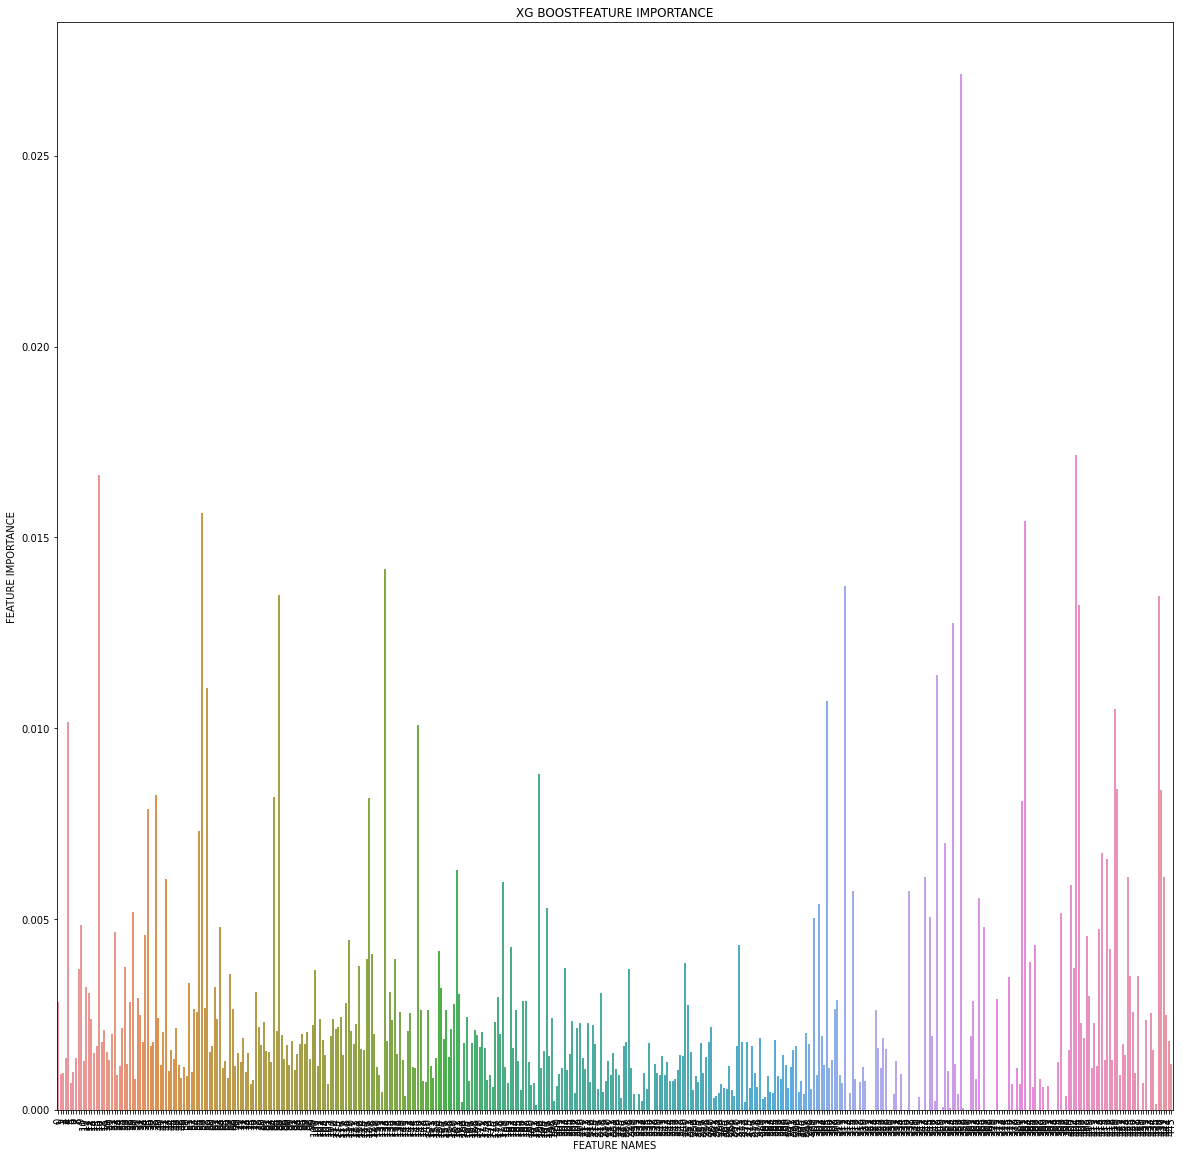

In [ ]:
utils.plot_feature_importance(xg_reg.feature_importances_,x_train_w2v_df.columns,'XG BOOST')

In [ ]:
featureScore(xg_reg.feature_importances_)

Feature: 0, Score: 0.00283
Feature: 1, Score: 0.00093
Feature: 2, Score: 0.00097
Feature: 3, Score: 0.00137
Feature: 4, Score: 0.01017
Feature: 5, Score: 0.00071
Feature: 6, Score: 0.00099
Feature: 7, Score: 0.00135
Feature: 8, Score: 0.00369
Feature: 9, Score: 0.00485
Feature: 10, Score: 0.00126
Feature: 11, Score: 0.00320
Feature: 12, Score: 0.00307
Feature: 13, Score: 0.00237
Feature: 14, Score: 0.00149
Feature: 15, Score: 0.00166
Feature: 16, Score: 0.01662
Feature: 17, Score: 0.00177
Feature: 18, Score: 0.00209
Feature: 19, Score: 0.00151
Feature: 20, Score: 0.00131
Feature: 21, Score: 0.00198
Feature: 22, Score: 0.00466
Feature: 23, Score: 0.00092
Feature: 24, Score: 0.00113
Feature: 25, Score: 0.00213
Feature: 26, Score: 0.00375
Feature: 27, Score: 0.00119
Feature: 28, Score: 0.00281
Feature: 29, Score: 0.00518
Feature: 30, Score: 0.00081
Feature: 31, Score: 0.00293
Feature: 32, Score: 0.00249
Feature: 33, Score: 0.00178
Feature: 34, Score: 0.00459
Feature: 35, Score: 0.00788
Fe

In [ ]:
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_w2v_df,y_pred_W2vec_xgboost)

dict_info['Model'].append('XGboost')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

## Random Forest

In [ ]:
# utils.hyperparameterTuning_RandomForest(x_train_w2v_df,y_train_w2v_df)
rnd_clf = RandomForestRegressor(n_estimators=20, min_samples_split=10, min_samples_leaf=4,max_features='sqrt',max_depth=10,bootstrap=True)
rnd_clf.fit(x_train_w2v_df, y_train_w2v_df)
y_pred_w2vec_rnd = rnd_clf.predict(x_test_w2v_df)

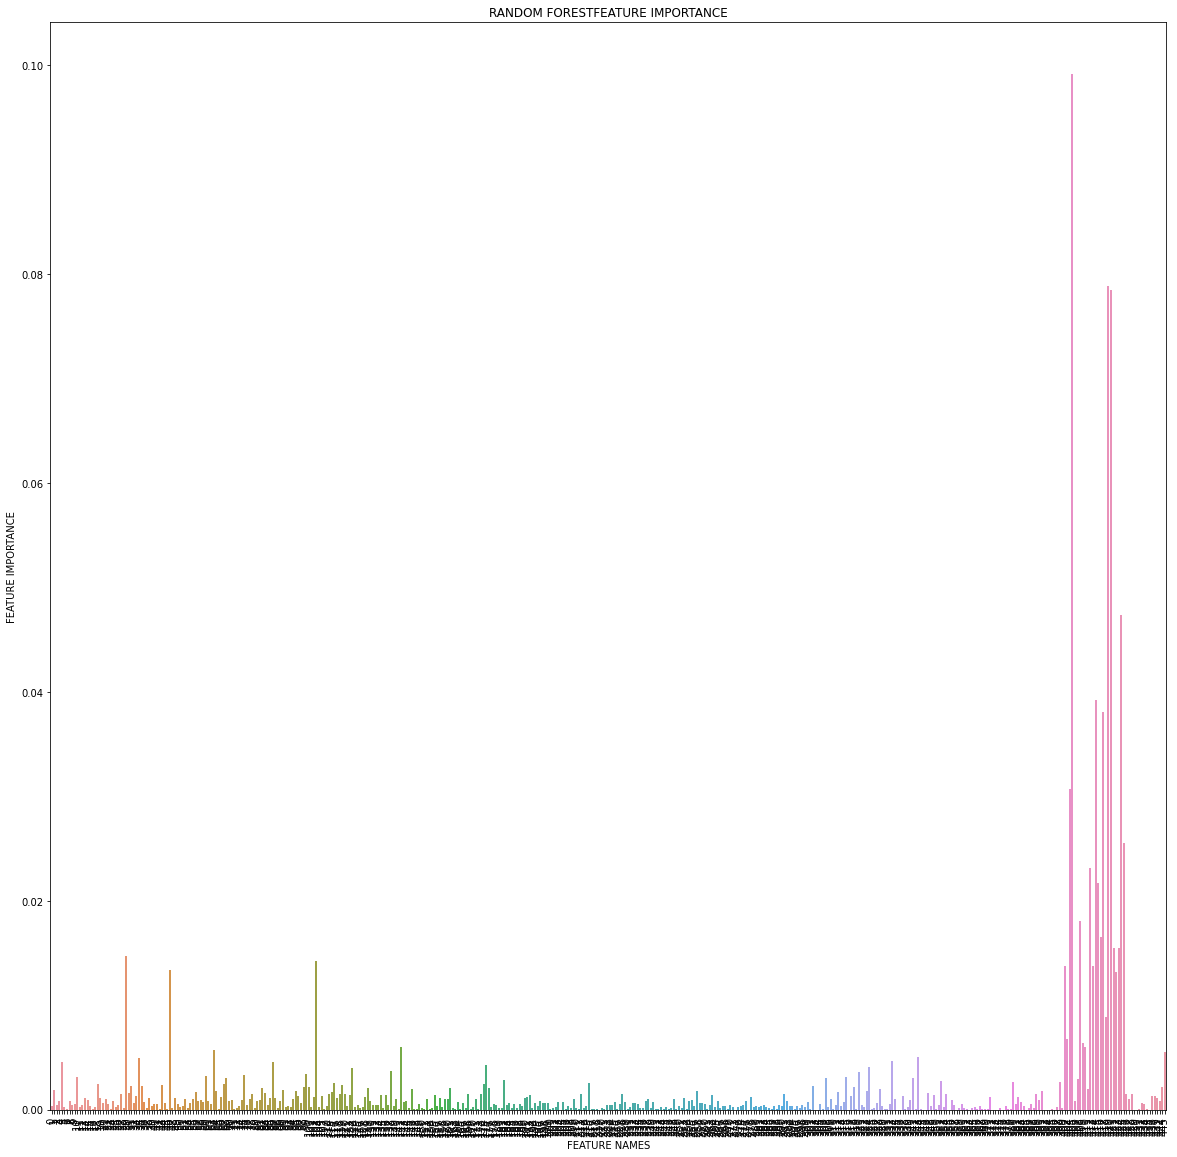

In [ ]:
utils.plot_feature_importance(rnd_clf.feature_importances_,x_train_w2v_df.columns,'RANDOM FOREST')

In [ ]:
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_w2v_df,y_pred_w2vec_rnd)

dict_info['Model'].append('Random Forest')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

## MLP

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp_GS = MLPRegressor(activation='relu',alpha=0.001,hidden_layer_sizes=(50, 50, 50),learning_rate='constant',solver='adam')
mlp_GS.fit(x_train_w2v_df, y_train_w2v_df)
y_pred_w2vec_mlp = mlp_GS.predict(x_test_w2v_df)

In [ ]:
# utils.metrics(y_test_w2v_df,y_pred_mlp)

In [ ]:
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_w2v_df,y_pred_w2vec_mlp)

dict_info['Model'].append('MLP')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

## SVM

In [ ]:
from sklearn.svm import LinearSVR
svr= LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,tol=0.0001, verbose=0)
svr.fit(x_train_w2v_df, y_train_w2v_df)
y_pred_w2vec_SVR = svr.predict(x_test_w2v_df)

In [ ]:
# utils.metrics(y_test_w2v_df,y_pred_SVR)

In [ ]:
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_w2v_df,y_pred_w2vec_SVR)

dict_info['Model'].append('SVR')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

In [ ]:
dfData = pd.DataFrame(dict_info)
dfData

,Model,RMSE,R2,MAE,RMSLE,max_error_
0,Lightgbm,0.007498,0.610671,0.001773,-4.893115,0.323809
1,XGboost,0.006736,0.685829,0.001435,-5.000359,0.234300
2,Random Forest,0.007624,0.597488,0.001672,-4.876465,0.389754
3,MLP,0.009621,0.359014,0.003246,-4.643823,0.484641
4,SVR,0.012425,-0.069177,0.003161,-4.388005,0.523607
